## Final Project Submission

Please fill out:
* Student name: Dicchyant Gurung
* Student pace: Self paced
* Scheduled project review date/time: 
* Instructor name: Jeff Herman
* Blog post URL:https://dicchyanttamu.wixsite.com/data/post/different-ways-to-normalize-distribution-of-data


### Solution

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


### Step 1: Clean the data

In [3]:
df.rename(columns=lambda x: x.title(), inplace=True)
df.head()

,Id,Date,Price,Bedrooms,Bathrooms,Sqft_Living,Sqft_Lot,Floors,Waterfront,View,...,Grade,Sqft_Above,Sqft_Basement,Yr_Built,Yr_Renovated,Zipcode,Lat,Long,Sqft_Living15,Sqft_Lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
df.rename(columns={'Date':'Date Sold'}, inplace=True)
df.head()

,Id,Date Sold,Price,Bedrooms,Bathrooms,Sqft_Living,Sqft_Lot,Floors,Waterfront,View,...,Grade,Sqft_Above,Sqft_Basement,Yr_Built,Yr_Renovated,Zipcode,Lat,Long,Sqft_Living15,Sqft_Lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


### Look for missing values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             21597 non-null  int64  
 1   Date Sold      21597 non-null  object 
 2   Price          21597 non-null  float64
 3   Bedrooms       21597 non-null  int64  
 4   Bathrooms      21597 non-null  float64
 5   Sqft_Living    21597 non-null  int64  
 6   Sqft_Lot       21597 non-null  int64  
 7   Floors         21597 non-null  float64
 8   Waterfront     19221 non-null  float64
 9   View           21534 non-null  float64
 10  Condition      21597 non-null  int64  
 11  Grade          21597 non-null  int64  
 12  Sqft_Above     21597 non-null  int64  
 13  Sqft_Basement  21597 non-null  object 
 14  Yr_Built       21597 non-null  int64  
 15  Yr_Renovated   17755 non-null  float64
 16  Zipcode        21597 non-null  int64  
 17  Lat            21597 non-null  float64
 18  Long  

In [6]:
df.isnull().sum()

Id                  0
Date Sold           0
Price               0
Bedrooms            0
Bathrooms           0
Sqft_Living         0
Sqft_Lot            0
Floors              0
Waterfront       2376
View               63
Condition           0
Grade               0
Sqft_Above          0
Sqft_Basement       0
Yr_Built            0
Yr_Renovated     3842
Zipcode             0
Lat                 0
Long                0
Sqft_Living15       0
Sqft_Lot15          0
dtype: int64

In [7]:
df.Waterfront.value_counts()

0.0    19075
1.0      146
Name: Waterfront, dtype: int64

'Waterfront' seems to be a categorical column with 0 as no waterfront and 1 as waterfront available. Since, the majority of the houses does not seem to have a waterfront, we will assume that the missing values also does not have a waterfront. 

We will replace the missing values with zero.

In [8]:
df.View.value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: View, dtype: int64

'View' is another categorcial column with values from 0 to 4. Since the majority of the data points towards 0 for not viewed, we are going to assume that the houses with missing values have also not been viewed.

We will replace the missing values with zero.

In [9]:
df.Yr_Renovated.value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: Yr_Renovated, Length: 70, dtype: int64

'Yr_Renovated' has 17011 values as 0. This means that majority of the houses have not been renovated in our data set. We will also assume here that none of the houses with missing values have been renovated.

We will replace the missing values with zero.

In [10]:
df.fillna(0, inplace=True)

In [11]:
df.isnull().sum()

Id               0
Date Sold        0
Price            0
Bedrooms         0
Bathrooms        0
Sqft_Living      0
Sqft_Lot         0
Floors           0
Waterfront       0
View             0
Condition        0
Grade            0
Sqft_Above       0
Sqft_Basement    0
Yr_Built         0
Yr_Renovated     0
Zipcode          0
Lat              0
Long             0
Sqft_Living15    0
Sqft_Lot15       0
dtype: int64

In [12]:
df.Yr_Renovated.value_counts()

0.0       20853
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: Yr_Renovated, Length: 70, dtype: int64

Majority of the houses are not renovated and since the renovated values account to less than 10% of the total dataset, we will be dropping this column as a predictor for our model.

In [13]:
df.drop(['Yr_Renovated'], axis=1, inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             21597 non-null  int64  
 1   Date Sold      21597 non-null  object 
 2   Price          21597 non-null  float64
 3   Bedrooms       21597 non-null  int64  
 4   Bathrooms      21597 non-null  float64
 5   Sqft_Living    21597 non-null  int64  
 6   Sqft_Lot       21597 non-null  int64  
 7   Floors         21597 non-null  float64
 8   Waterfront     21597 non-null  float64
 9   View           21597 non-null  float64
 10  Condition      21597 non-null  int64  
 11  Grade          21597 non-null  int64  
 12  Sqft_Above     21597 non-null  int64  
 13  Sqft_Basement  21597 non-null  object 
 14  Yr_Built       21597 non-null  int64  
 15  Zipcode        21597 non-null  int64  
 16  Lat            21597 non-null  float64
 17  Long           21597 non-null  float64
 18  Sqft_L

In [15]:
df.head()

,Id,Date Sold,Price,Bedrooms,Bathrooms,Sqft_Living,Sqft_Lot,Floors,Waterfront,View,Condition,Grade,Sqft_Above,Sqft_Basement,Yr_Built,Zipcode,Lat,Long,Sqft_Living15,Sqft_Lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503


Column 'Lat' and 'Long' represents the location of the houses. We will use the Zipcode column for this model to account for location.

Lat and Long will be dropped.

In [16]:
df.drop(['Lat', 'Long'], axis=1, inplace=True)
df.head()

,Id,Date Sold,Price,Bedrooms,Bathrooms,Sqft_Living,Sqft_Lot,Floors,Waterfront,View,Condition,Grade,Sqft_Above,Sqft_Basement,Yr_Built,Zipcode,Sqft_Living15,Sqft_Lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,98178,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,98125,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,98028,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,98136,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,98074,1800,7503


### Step 2: Pre-Process the data

Since we are about to split continuous and categorical values. It'll be a good idea to make the 'Id' column an index such that if we have to join column later, we can do it with complete accuracy.

In [17]:
df1 = df.set_index('Id', drop=True).copy()

### Identify categorical and continuous variables

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

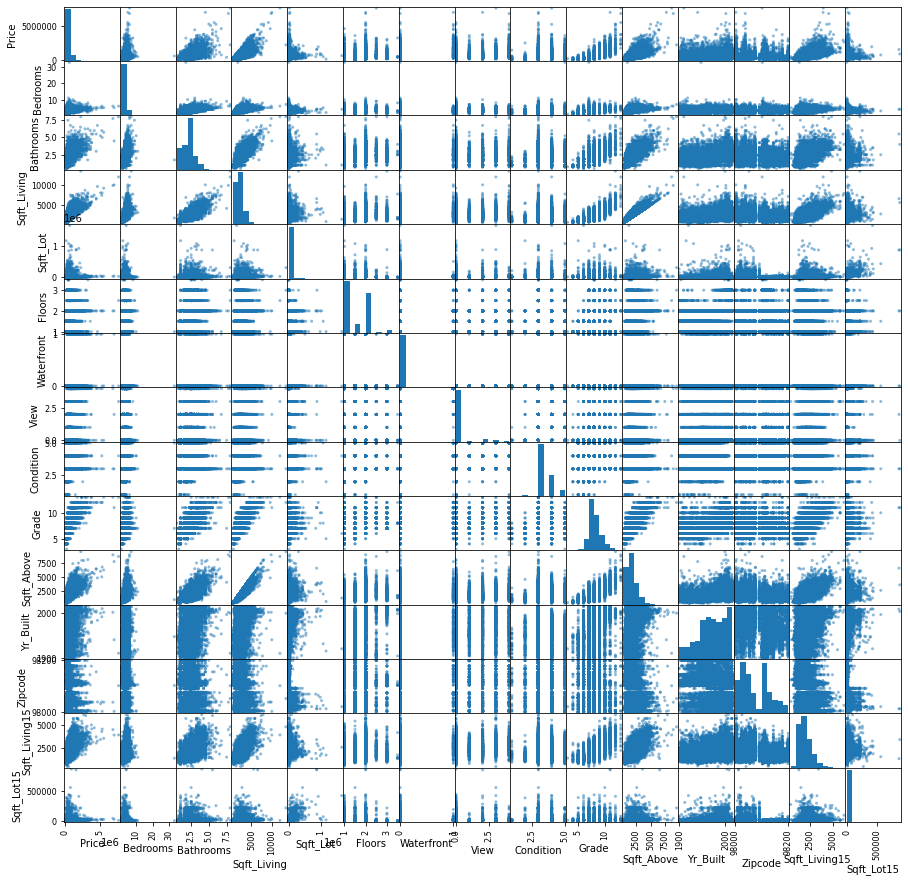

In [19]:
pd.plotting.scatter_matrix(df1, figsize=(15,15));

Scatter matrix allows us to quickly spot continuous vs categorical values. Categorical values will have a non-continuous and distinct patterns which is seen here mostly in the middle of the scatter-plot. Continuous values will have a linear and continous spread of data trending towards one direction. Let's get a more clearer graph to classify each variable.

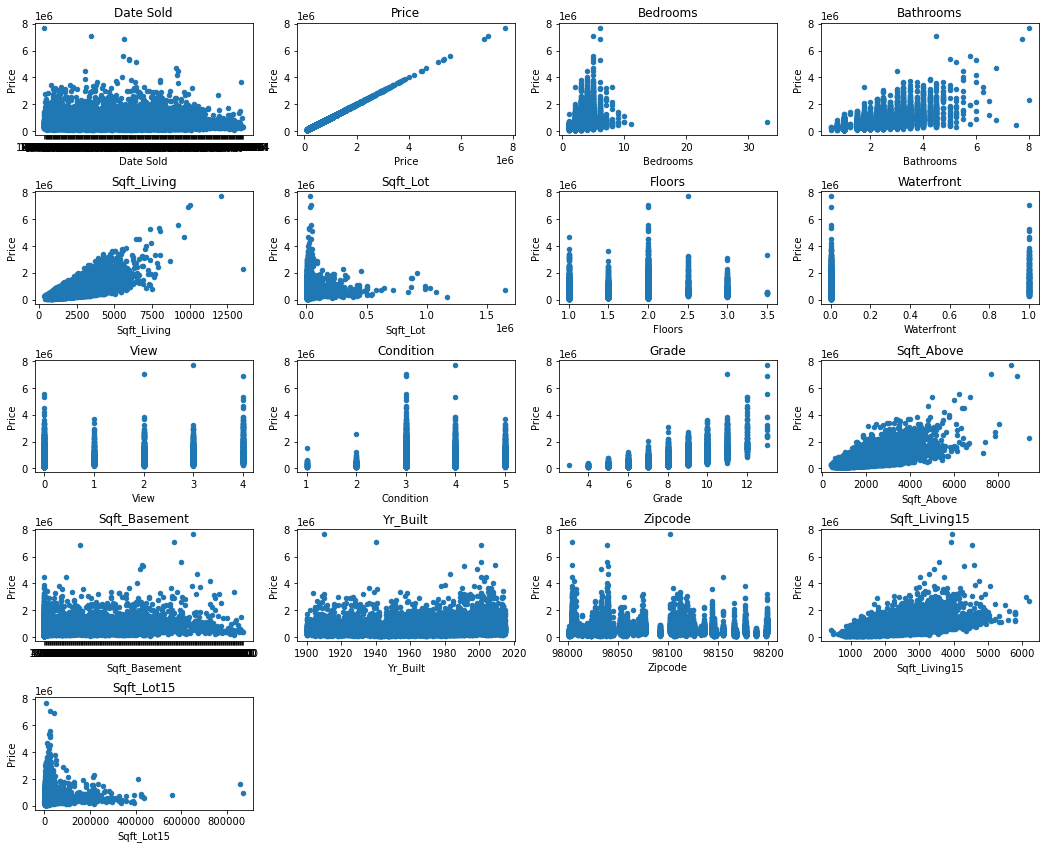

In [20]:
plt.figure(figsize=(18,30))
plt.subplots_adjust(hspace = 0.5)

for index, value in enumerate(df1):
    ax = plt.subplot(10, 4, index+1)
    df1.plot(value, 'Price', ax=ax, kind='scatter', legend=False)
    ax.set_title(value);

In [21]:
continuous = ['Price', 'Sqft_Living', 'Sqft_Lot', 'Sqft_Above', 'Sqft_Basement', 'Sqft_Living15', 'Sqft_Lot15']
categoricals = ['Date Sold', 'Bedrooms', 'Bathrooms', 'Floors', 'Waterfront', 'View', 'Condition', 'Grade', 'Yr_Built', 'Zipcode']

### Continuous Variables

In [22]:
continuous_df = df1[continuous].copy()

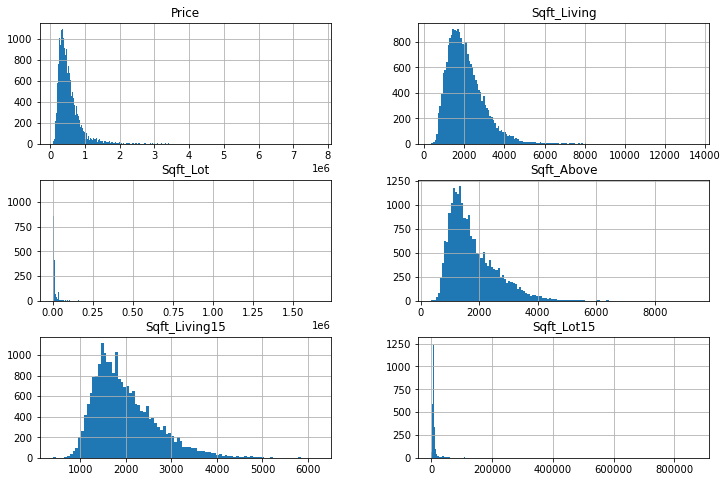

In [23]:
continuous_df.hist(figsize=(12,8), bins='auto');

The basement plot is also missing. Let's see what happened here.

In [24]:
continuous_df.Sqft_Basement.value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
588.0         1
2180.0        1
1135.0        1
1913.0        1
2310.0        1
Name: Sqft_Basement, Length: 304, dtype: int64

In [25]:
type(continuous_df.Sqft_Basement.values[0])

str

There is a unique character '?' in Sqft_Basement and also the values are recorded as string. We will have to remove the character and also convert the values to a number format(float).

Instead of removing the whole row with data from all other predictors, we will just replace ? with zero values.

In [26]:
for i in continuous_df.Sqft_Basement.values:
    if i == '?':
        continuous_df.Sqft_Basement.replace(i, '0.0', inplace=True)

In [27]:
continuous_df.Sqft_Basement.value_counts(sort=True)

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
768.0         1
2810.0        1
1770.0        1
2390.0        1
2310.0        1
Name: Sqft_Basement, Length: 303, dtype: int64

Now, let's change all values to a number format.

In [28]:
for i in continuous_df.Sqft_Basement.values:
    continuous_df.Sqft_Basement.replace(i, float(i), inplace=True)

In [29]:
type(continuous_df.Sqft_Basement.values[0])

numpy.float64

Looking at the histogram again.

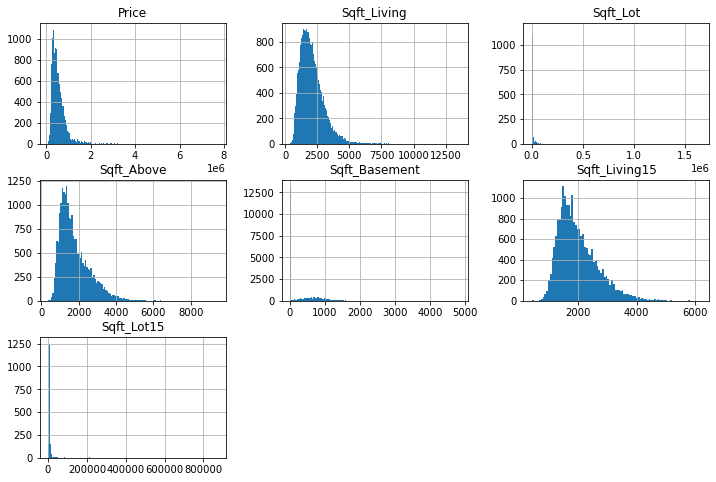

In [30]:
continuous_df.hist(figsize=(12,8), bins='auto');

We have all the plots now.

You can alse see in the above histograms that the continuous varables are postively skewed with outliers on the higher end of the values.

Let's remove the outliers to make the data more normal.

### Remove Outliers

Let's create a box plot to check for outliers

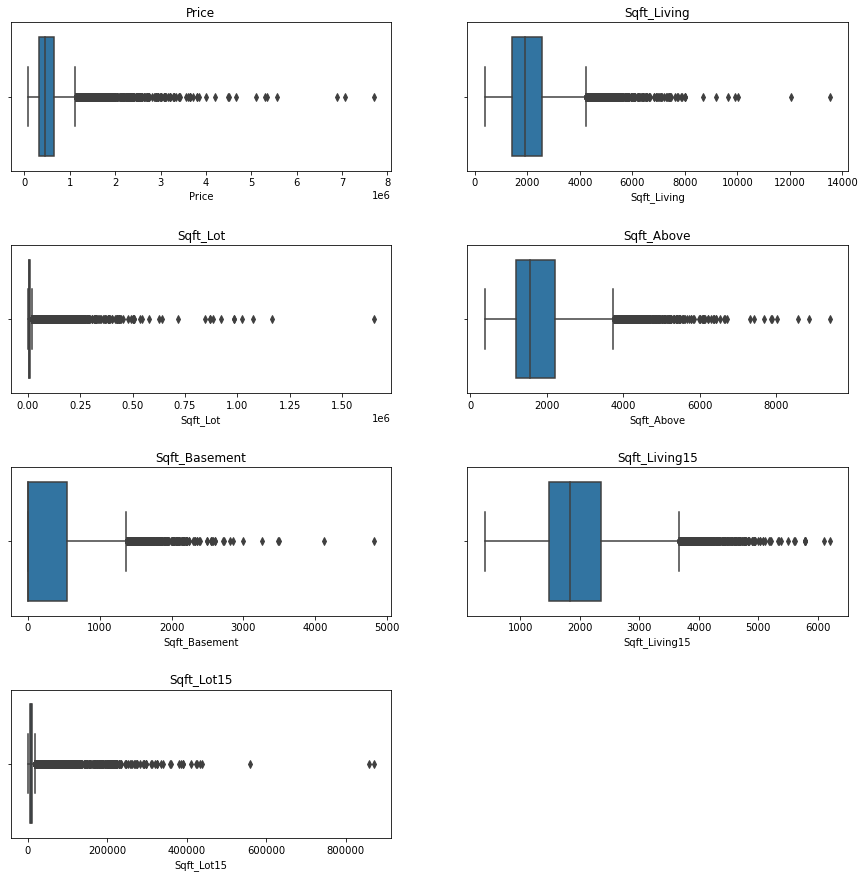

In [31]:
import seaborn as sns

plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace = 0.5)

for index, value in enumerate(continuous_df):
    ax = plt.subplot(4, 2, index+1)
    sns.boxplot(ax=ax, x=continuous_df[value])
    ax.set_title(value)

Scatter plot also helps spot out outliers.

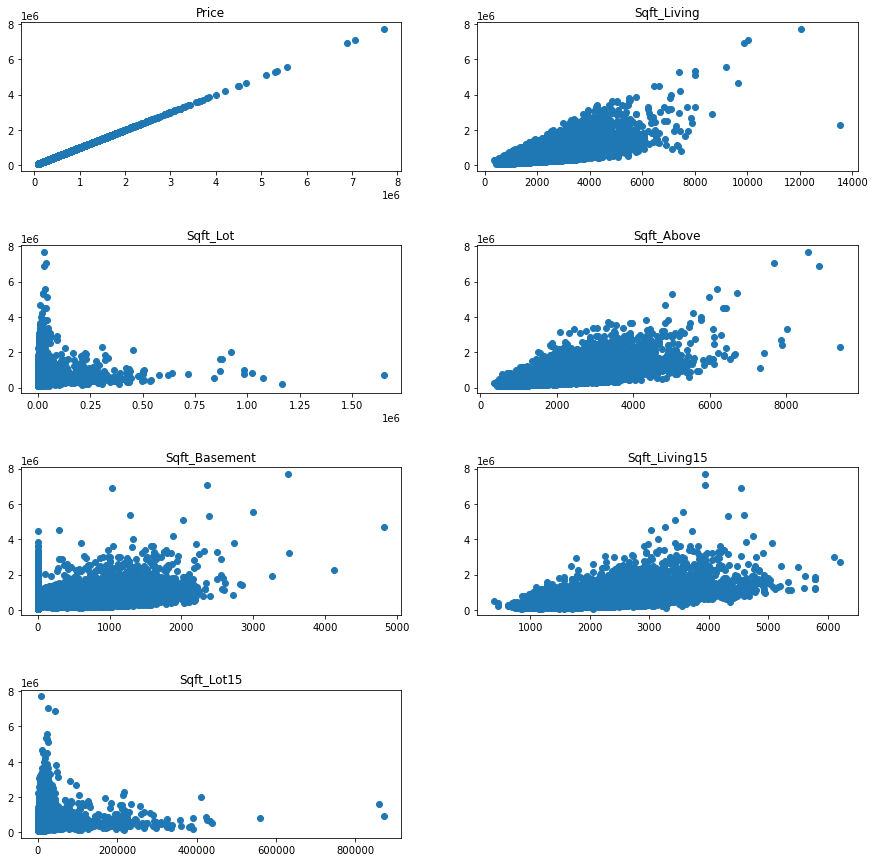

In [32]:
plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace = 0.5)

for index, value in enumerate(continuous_df):
    ax = plt.subplot(4, 2, index+1)
    ax.scatter(x=continuous_df[value], y=continuous_df['Price'])
    ax.set_title(value)

We're going to use z-score to identify and remove outliers.

### Z-Score

In [33]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(continuous_df))

In [34]:
cont_df_o = continuous_df[(z < 3).all(axis=1)]

In [35]:
cont_df_o.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20341 entries, 7129300520 to 1523300157
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price          20341 non-null  float64
 1   Sqft_Living    20341 non-null  int64  
 2   Sqft_Lot       20341 non-null  int64  
 3   Sqft_Above     20341 non-null  int64  
 4   Sqft_Basement  20341 non-null  float64
 5   Sqft_Living15  20341 non-null  int64  
 6   Sqft_Lot15     20341 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 1.2 MB


Let's do the box-plot again.

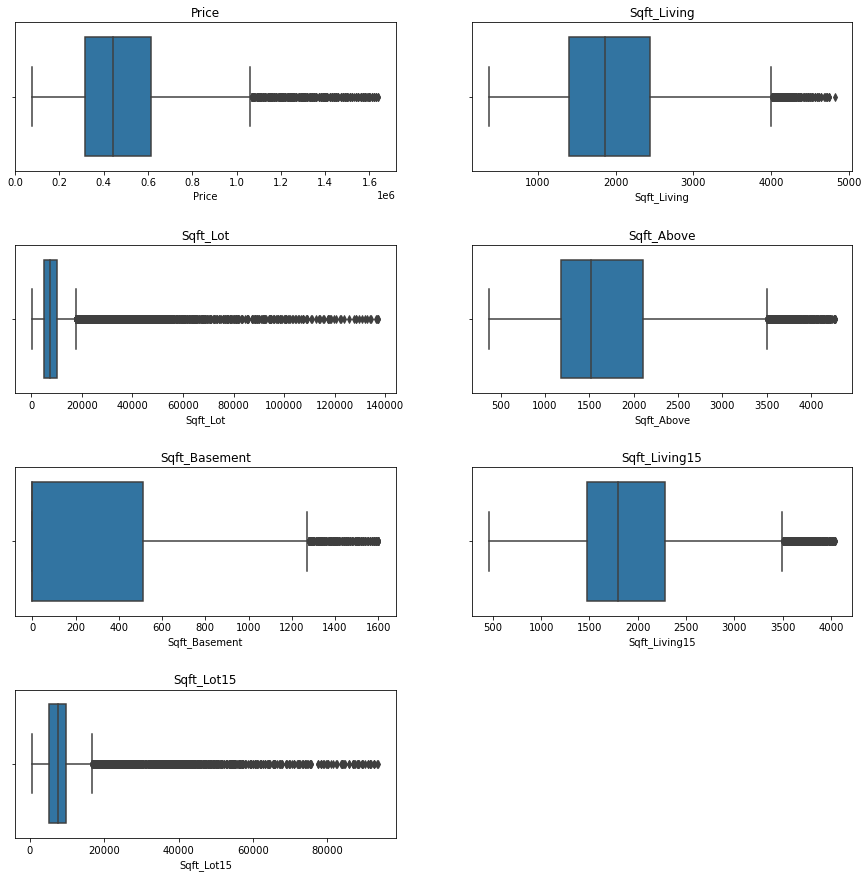

In [36]:
plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace = 0.5)

for index, value in enumerate(cont_df_o):
    ax = plt.subplot(4, 2, index+1)
    sns.boxplot(ax=ax, x=cont_df_o[value])
    ax.set_title(value)

We can see a lot of improvement in the distribution. However, there are still a lot of outlying data that are extended towards the right of the box plot.

Let's plot this again on a scatter-plot.

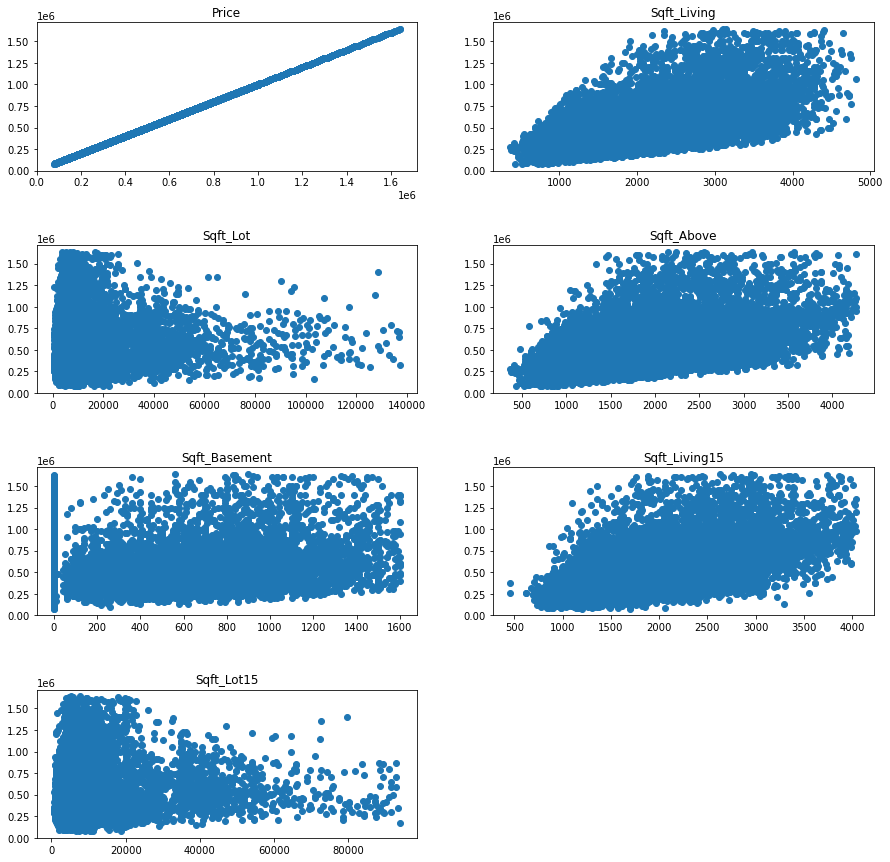

In [37]:
plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace = 0.5)

for index, value in enumerate(cont_df_o):
    ax = plt.subplot(4, 2, index+1)
    ax.scatter(x=cont_df_o[value], y=cont_df_o['Price'])
    ax.set_title(value)

The scatter plot confirms the sparsity as the data increases in value.

Box-plot uses the inter-quartile range to plot the data. Anything over Q3 + 1.5 IQR is shown as outliers.

In [38]:
for predictor in cont_df_o.columns:
    Q1 = cont_df_o[predictor].quantile(0.25)
    Q3 = cont_df_o[predictor].quantile(0.75)
    IQR = Q3 - Q1
    Outliers = Q3 + (1.5 * IQR)
    print (predictor, ':', Outliers)

Price : 1065000.0
Sqft_Living : 4000.0
Sqft_Lot : 17580.0
Sqft_Above : 3505.0
Sqft_Basement : 1275.0
Sqft_Living15 : 3495.0
Sqft_Lot15 : 16717.5


Let's remove all values over Q3.

In [39]:
dfc = cont_df_o.copy()

In [40]:
cont_df_final = dfc[(dfc.Price < 1000000) & (dfc.Sqft_Living < 4000) & (dfc.Sqft_Lot < 18000) &
                    (dfc.Sqft_Above < 3500) & (dfc.Sqft_Basement < 1275) & (dfc.Sqft_Living15 < 3500) & 
                    (dfc.Sqft_Lot15 < 17000)].copy()

In [41]:
cont_df_final.head()

,Price,Sqft_Living,Sqft_Lot,Sqft_Above,Sqft_Basement,Sqft_Living15,Sqft_Lot15
Id,,,,,,,
7129300520,221900.0,1180,5650,1180,0.0,1340,5650
6414100192,538000.0,2570,7242,2170,400.0,1690,7639
5631500400,180000.0,770,10000,770,0.0,2720,8062
2487200875,604000.0,1960,5000,1050,910.0,1360,5000
1954400510,510000.0,1680,8080,1680,0.0,1800,7503


Let's check the new dataframe on the box-plot again.

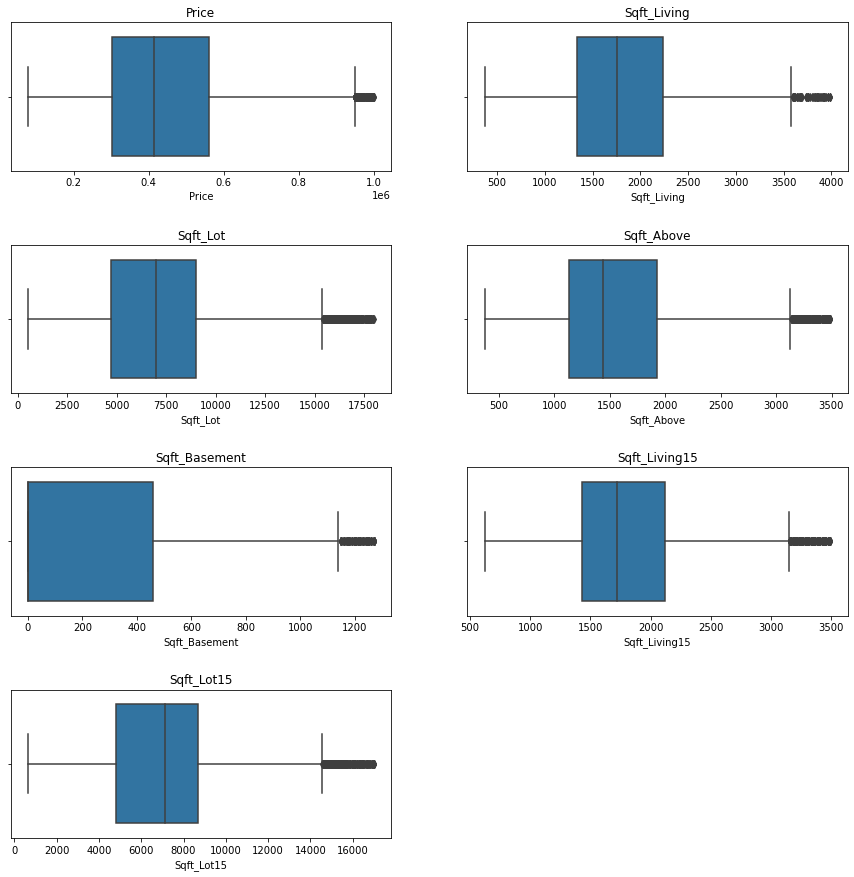

In [42]:
plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace = 0.5)

for index, value in enumerate(cont_df_final):
    ax = plt.subplot(4, 2, index+1)
    sns.boxplot(ax=ax, x=cont_df_final[value])
    ax.set_title(value)

### Scatter plot

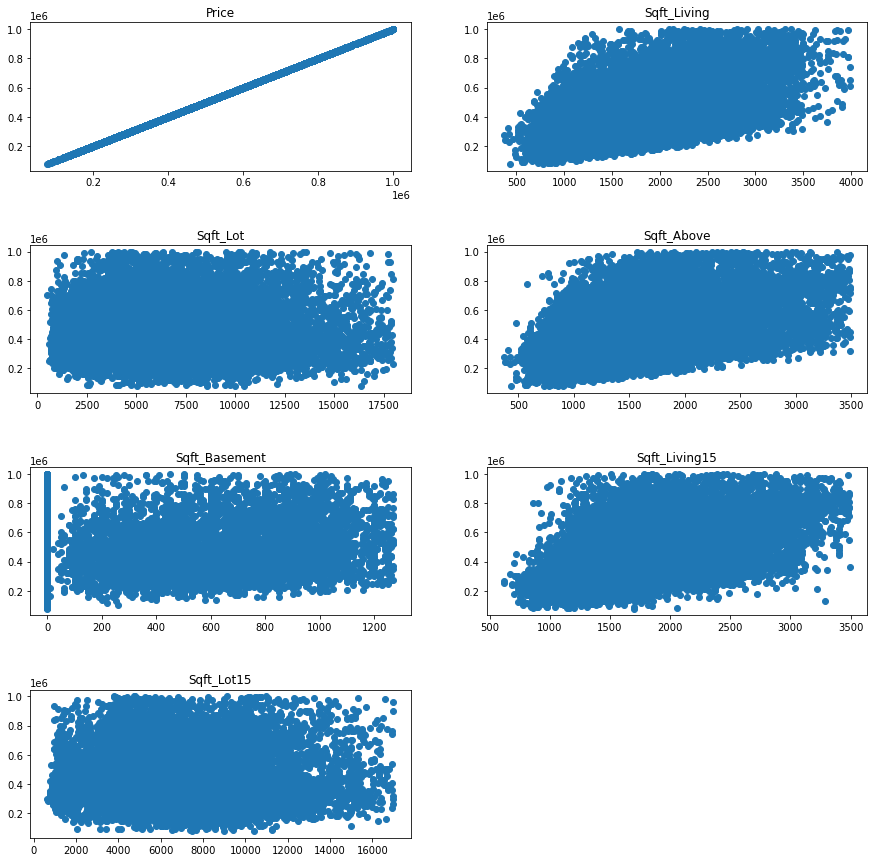

In [43]:
plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace = 0.5)

for index, value in enumerate(cont_df_final):
    ax = plt.subplot(4, 2, index+1)
    ax.scatter(x=cont_df_final[value], y=cont_df_final['Price'])
    ax.set_title(value)

Our plot show much improvement in the distribution of the data.

Finally, plotting this on a histogram.

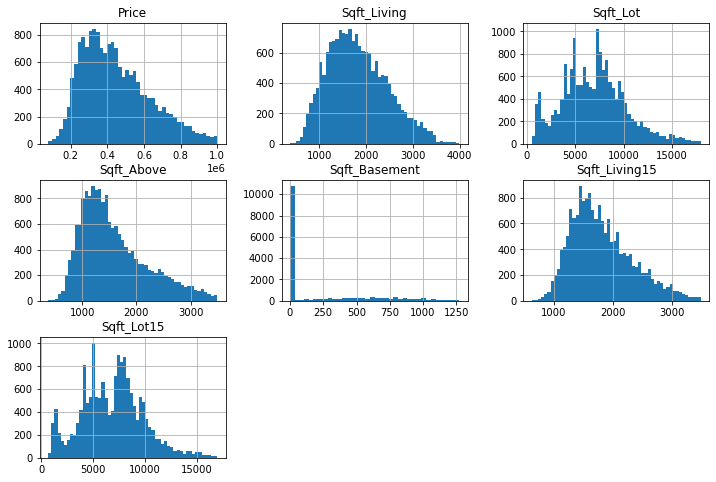

In [44]:
cont_df_final.hist(figsize=(12,8), bins='auto');

Our final dataset now looks much better for continuous variables.

However, the Sqft_Basement still has high positive skewness as too many houses does not have a basement. 

In [45]:
cont_df_final.Sqft_Basement.value_counts()

0.0      10793
600.0      189
500.0      189
700.0      175
800.0      162
         ...  
172.0        1
243.0        1
225.0        1
516.0        1
602.0        1
Name: Sqft_Basement, Length: 163, dtype: int64

In [46]:
cont_df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17022 entries, 7129300520 to 1523300157
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price          17022 non-null  float64
 1   Sqft_Living    17022 non-null  int64  
 2   Sqft_Lot       17022 non-null  int64  
 3   Sqft_Above     17022 non-null  int64  
 4   Sqft_Basement  17022 non-null  float64
 5   Sqft_Living15  17022 non-null  int64  
 6   Sqft_Lot15     17022 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 1.0 MB


For our total dataset of 17022 rows, we have 10793 houses with no basement. This means that around 7000 houses have a basement. Since the split is almost 50/50 for having a basement and not having a basement, we will change this into a categorical predictor with 'Basement' and 'No Basement' to capture its value.

In [47]:
for i in cont_df_final.Sqft_Basement.values:
    if i > 0:
        cont_df_final.Sqft_Basement.replace(i, 1, inplace=True)

In [48]:
cont_df_final

,Price,Sqft_Living,Sqft_Lot,Sqft_Above,Sqft_Basement,Sqft_Living15,Sqft_Lot15
Id,,,,,,,
7129300520,221900.0,1180,5650,1180,0.0,1340,5650
6414100192,538000.0,2570,7242,2170,1.0,1690,7639
5631500400,180000.0,770,10000,770,0.0,2720,8062
2487200875,604000.0,1960,5000,1050,1.0,1360,5000
1954400510,510000.0,1680,8080,1680,0.0,1800,7503
...,...,...,...,...,...,...,...
263000018,360000.0,1530,1131,1530,0.0,1530,1509
6600060120,400000.0,2310,5813,2310,0.0,1830,7200
1523300141,402101.0,1020,1350,1020,0.0,1020,2007


Since 0 and 1 are binary values. We will not have to transform the Sqft_Basement columns. We will leave this and move ahead with our pre-processing.

### Categorical variables

In [49]:
categoricals = ['Date Sold', 'Bedrooms', 'Bathrooms', 'Floors', 'Waterfront', 'View', 'Condition', 'Grade', 'Yr_Built', 'Zipcode']

In [50]:
categorical_df = df1[categoricals].copy()

In [51]:
categorical_df.head()

,Date Sold,Bedrooms,Bathrooms,Floors,Waterfront,View,Condition,Grade,Yr_Built,Zipcode
Id,,,,,,,,,,
7129300520,10/13/2014,3,1.00,1.0,0.0,0.0,3,7,1955,98178
6414100192,12/9/2014,3,2.25,2.0,0.0,0.0,3,7,1951,98125
5631500400,2/25/2015,2,1.00,1.0,0.0,0.0,3,6,1933,98028
2487200875,12/9/2014,4,3.00,1.0,0.0,0.0,5,7,1965,98136
1954400510,2/18/2015,3,2.00,1.0,0.0,0.0,3,8,1987,98074


Let's check all the unique values in each column.

In [52]:
for i in categorical_df.columns:
    print (i +':', len(categorical_df[i].value_counts()))

Date Sold: 372
Bedrooms: 12
Bathrooms: 29
Floors: 6
Waterfront: 2
View: 5
Condition: 5
Grade: 11
Yr_Built: 116
Zipcode: 70


Let's futher check the distribution of classes in each column.

In [53]:
for i in categorical_df.columns:
    print (i + ': \n')
    print (categorical_df[i].value_counts().sort_values(ascending=False))
    print ('\n')

Date Sold: 

6/23/2014    142
6/25/2014    131
6/26/2014    131
7/8/2014     127
4/27/2015    126
            ... 
5/17/2014      1
3/8/2015       1
1/10/2015      1
8/30/2014      1
8/3/2014       1
Name: Date Sold, Length: 372, dtype: int64


Bedrooms: 

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
33       1
11       1
Name: Bedrooms, dtype: int64


Bathrooms: 

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: Bathrooms, dtype: int64


Floors: 

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: Floors, dtype: int64


Waterfront: 

0.0    21451
1.0      146
N

Visualizing the data on a scatter plot.

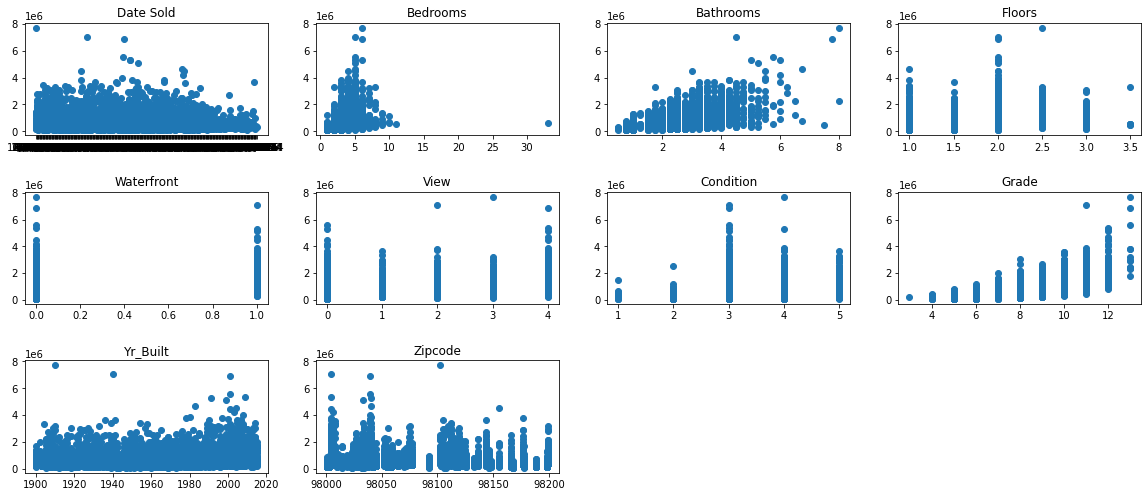

In [54]:
plt.figure(figsize=(20,30))
plt.subplots_adjust(hspace = 0.5)

for index, value in enumerate(categorical_df):
    ax = plt.subplot(10, 4, index+1)
    ax.scatter(x=categorical_df[value], y=df1['Price'])
    ax.set_title(value);

From the above graph, we can see that 'DateSold', 'Yr_Built', and 'Zipcode' are true categorical values while the rest are ordinal. There are also a lot of outliers present in the data, which needs to be removed.

In [55]:
ordinal = ['Bedrooms', 'Bathrooms', 'Floors', 'View', 'Condition', 'Grade']

In [56]:
ordinal_df = categorical_df[ordinal]

In [57]:
ordinal_df

,Bedrooms,Bathrooms,Floors,View,Condition,Grade
Id,,,,,,
7129300520,3,1.00,1.0,0.0,3,7
6414100192,3,2.25,2.0,0.0,3,7
5631500400,2,1.00,1.0,0.0,3,6
2487200875,4,3.00,1.0,0.0,5,7
1954400510,3,2.00,1.0,0.0,3,8
...,...,...,...,...,...,...
263000018,3,2.50,3.0,0.0,3,8
6600060120,4,2.50,2.0,0.0,3,8
1523300141,2,0.75,2.0,0.0,3,7


The ordinal variables have an order so we do not need to convert them into dummy variables. However, we can reduce the variability among each with some z-score calculation.

### Z-Score

In [58]:
z2 = np.abs(stats.zscore(ordinal_df))
print(z2)

[[0.40290302 1.45107268 0.91555234 0.30494873 0.62998644 0.56080027]
 [0.40290302 0.17448579 0.93743087 0.30494873 0.62998644 0.56080027]
 [1.48249316 1.45107268 0.91555234 0.30494873 0.62998644 1.41318983]
 ...
 [1.48249316 1.77618438 0.93743087 0.30494873 0.62998644 0.56080027]
 [0.40290302 0.49959749 0.93743087 0.30494873 0.62998644 0.2915893 ]
 [1.48249316 1.77618438 0.93743087 0.30494873 0.62998644 0.56080027]]


In [59]:
ordinal_df_o = ordinal_df[(z2 < 3).all(axis=1)]

In [60]:
ordinal_df_o

,Bedrooms,Bathrooms,Floors,View,Condition,Grade
Id,,,,,,
7129300520,3,1.00,1.0,0.0,3,7
6414100192,3,2.25,2.0,0.0,3,7
5631500400,2,1.00,1.0,0.0,3,6
2487200875,4,3.00,1.0,0.0,5,7
1954400510,3,2.00,1.0,0.0,3,8
...,...,...,...,...,...,...
263000018,3,2.50,3.0,0.0,3,8
6600060120,4,2.50,2.0,0.0,3,8
1523300141,2,0.75,2.0,0.0,3,7


In [61]:
ordinal_df_o.shape

(20476, 6)

The Z-score method seems to have removed about 1000 values. Let's plot this on a box-plot to see if we still see any more outliers.

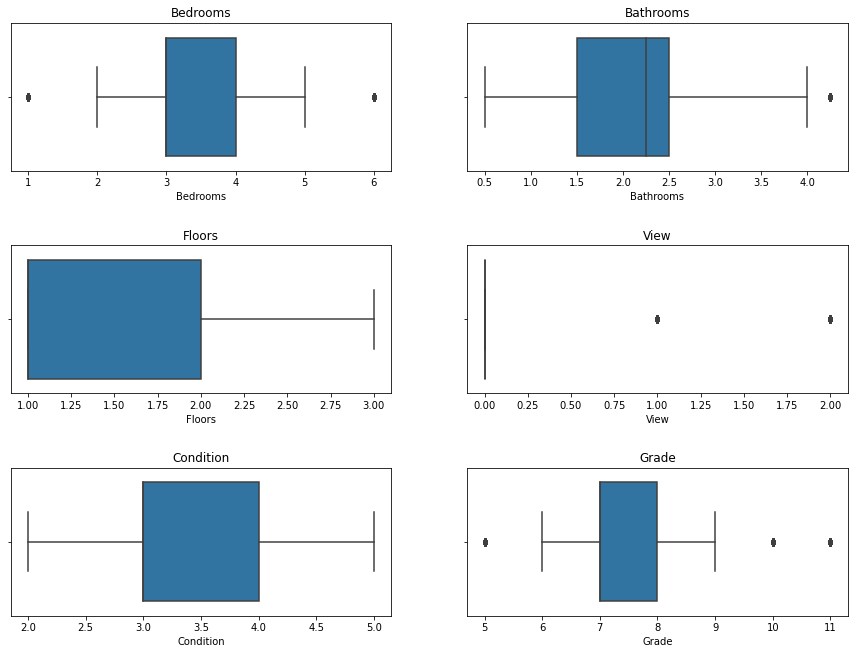

In [62]:
plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace = 0.5)

for index, value in enumerate(ordinal_df_o):
    ax = plt.subplot(4, 2, index+1)
    sns.boxplot(ax=ax, x=ordinal_df_o[value])
    ax.set_title(value)

### Scatter plot

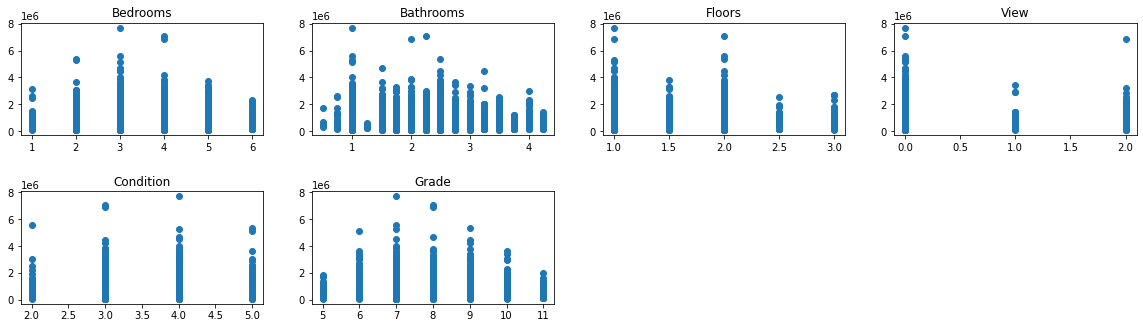

In [63]:
plt.figure(figsize=(20,30))
plt.subplots_adjust(hspace = 0.5)

for index, value in enumerate(ordinal_df_o):
    ax = plt.subplot(10, 4, index+1)
    ax.scatter(x=ordinal_df_o[value], y=df1['Price'][:20476])
    ax.set_title(value);

Both box-plot and scatter plot show presense of some outliers in the data.

Let's use our IQR technique again to spot the outliers.

In [64]:
for predictor in ordinal_df_o.columns:
    Q1 = ordinal_df_o[predictor].quantile(0.25)
    Q3 = ordinal_df_o[predictor].quantile(0.75)
    IQR = Q3 - Q1
    outliers_a = Q1 - (1.5 * IQR)
    outliers_b = Q3 + (1.5 * IQR)
    print (predictor, ':', outliers_a, '-', outliers_b)

Bedrooms : 1.5 - 5.5
Bathrooms : 0.0 - 4.0
Floors : -0.5 - 3.5
View : 0.0 - 0.0
Condition : 1.5 - 5.5
Grade : 5.5 - 9.5


Let's keep all values for now to capture all features in each variable.

Now, we will have to process the rest of the categorical columns. For these, we will create ranges for each.

### Create ranges for categories

In [65]:
categorical_df.head()

,Date Sold,Bedrooms,Bathrooms,Floors,Waterfront,View,Condition,Grade,Yr_Built,Zipcode
Id,,,,,,,,,,
7129300520,10/13/2014,3,1.00,1.0,0.0,0.0,3,7,1955,98178
6414100192,12/9/2014,3,2.25,2.0,0.0,0.0,3,7,1951,98125
5631500400,2/25/2015,2,1.00,1.0,0.0,0.0,3,6,1933,98028
2487200875,12/9/2014,4,3.00,1.0,0.0,0.0,5,7,1965,98136
1954400510,2/18/2015,3,2.00,1.0,0.0,0.0,3,8,1987,98074


### 1. Date Sold

In [66]:
cat_df = categorical_df[['Date Sold', 'Yr_Built', 'Zipcode']].copy()

In [67]:
years = []
for i in cat_df['Date Sold'].values:
    years.append(i[-4:])

In [68]:
cat_df['Year_Sold'] = years

In [69]:
cat_df.head()

,Date Sold,Yr_Built,Zipcode,Year_Sold
Id,,,,
7129300520,10/13/2014,1955,98178,2014
6414100192,12/9/2014,1951,98125,2014
5631500400,2/25/2015,1933,98028,2015
2487200875,12/9/2014,1965,98136,2014
1954400510,2/18/2015,1987,98074,2015


In [70]:
cat_df.Year_Sold.value_counts()

2014    14622
2015     6975
Name: Year_Sold, dtype: int64

There only seems to be 2 years representing date sold. There are enough data on both so we will keep this for our model.

In [71]:
cat_df.drop('Date Sold', axis=1, inplace=True)

### 2. Year Built

In [72]:
cat_df.Yr_Built.min()

1900

In [73]:
cat_df.Yr_Built.max()

2015

In [74]:
diff = 2015 - 1900
diff

115

In [75]:
diff/10

11.5

If we group them by 10 years each, we will have about 10 columns. Let's create groups of 10.

In [76]:
Yr_Built_Range = ['2015-2006', '2005-1996', '1995-1986', '1985-1976', '1975-1966',
                  '1965-1956', '1955-1946', '1945-1936', '1935-1926', '1925 and below']

In [77]:
year_df = cat_df.copy()

In [78]:
for i in year_df['Yr_Built']:
    if i > 2005:
        year_df['Yr_Built'].replace({i:'2006-2015'}, inplace=True)
    elif i <= 2005 & i > 1996:
        year_df['Yr_Built'].replace({i:'1996-2005'}, inplace=True)
    elif i <= 1995 & i > 1986:
        year_df['Yr_Built'].replace({i:'1986-1995'}, inplace=True)
    elif i <= 1985 & i > 1976:
        year_df['Yr_Built'].replace({i:'1976-1985'}, inplace=True)
    elif i <= 1975 & i > 1966:
        year_df['Yr_Built'].replace({i:'1966-1975'}, inplace=True)
    elif i <= 1965 & i > 1956:
        year_df['Yr_Built'].replace({i:'1956-1965'}, inplace=True)
    elif i <= 1955 & i > 1946:
        year_df['Yr_Built'].replace({i:'1946-1955'}, inplace=True)
    elif i <= 1945 & i > 1936:
        year_df['Yr_Built'].replace({i:'1936-1945'}, inplace=True)
    elif i <= 1935 & i > 1926:
        year_df['Yr_Built'].replace({i:'1926-1936'}, inplace=True)
    else:
        year_df['Yr_Built'].replace({i:'1925 and below'}, inplace=True)

In [79]:
year_df.Yr_Built.value_counts()

1925 and below    11400
2006-2015          2708
1966-1975          1546
1996-2005          1406
1986-1995          1112
1956-1965          1029
1946-1955          1018
1926-1936           619
1976-1985           456
1936-1945           303
Name: Yr_Built, dtype: int64

In [80]:
year_df.head()

,Yr_Built,Zipcode,Year_Sold
Id,,,
7129300520,1946-1955,98178,2014
6414100192,1925 and below,98125,2014
5631500400,1926-1936,98028,2015
2487200875,1956-1965,98136,2014
1954400510,1986-1995,98074,2015


### 3. Zipcode

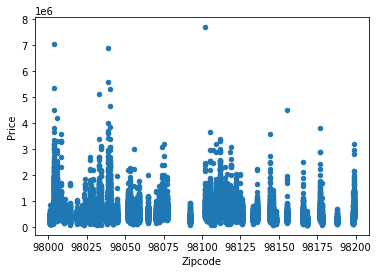

In [81]:
df1.plot.scatter('Zipcode', 'Price');

In [82]:
year_df.Zipcode.value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: Zipcode, Length: 70, dtype: int64

There are about 70 zipcodes. We will keep these for now as each zipcode might contribute to a certain value for a house.

In [83]:
year_df.shape

(21597, 3)

Let's create dummy variables for these ranges before we merge them with ordinal columns.

### One-hot Encoding

In [84]:
column_names = year_df.columns.to_list()

In [85]:
cat_ohe = pd.get_dummies(year_df, columns=column_names, drop_first=True)

In [86]:
cat_ohe.head()

,Yr_Built_1926-1936,Yr_Built_1936-1945,Yr_Built_1946-1955,Yr_Built_1956-1965,Yr_Built_1966-1975,Yr_Built_1976-1985,Yr_Built_1986-1995,Yr_Built_1996-2005,Yr_Built_2006-2015,Zipcode_98002,...,Zipcode_98148,Zipcode_98155,Zipcode_98166,Zipcode_98168,Zipcode_98177,Zipcode_98178,Zipcode_98188,Zipcode_98198,Zipcode_98199,Year_Sold_2015
Id,,,,,,,,,,,,,,,,,,,,,
7129300520,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6414100192,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5631500400,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2487200875,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1954400510,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


We have 79 new columns, which are a separate instance for each class within each category.

Let's merge these with the ordinal value to create our final categorical dataset.

In [87]:
cat_df_final = pd.merge(ordinal_df_o, cat_ohe, how='inner', on='Id')

In [88]:
cat_df_final.head()

,Bedrooms,Bathrooms,Floors,View,Condition,Grade,Yr_Built_1926-1936,Yr_Built_1936-1945,Yr_Built_1946-1955,Yr_Built_1956-1965,...,Zipcode_98148,Zipcode_98155,Zipcode_98166,Zipcode_98168,Zipcode_98177,Zipcode_98178,Zipcode_98188,Zipcode_98198,Zipcode_98199,Year_Sold_2015
Id,,,,,,,,,,,,,,,,,,,,,
7129300520,3,1.00,1.0,0.0,3,7,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
6414100192,3,2.25,2.0,0.0,3,7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5631500400,2,1.00,1.0,0.0,3,6,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2487200875,4,3.00,1.0,0.0,5,7,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1954400510,3,2.00,1.0,0.0,3,8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [89]:
cat_df_final.shape

(20816, 85)

Finally, let's create our preprocessed dataframe by merging the continuous with transformed categorical values.

In [90]:
preprocessed = pd.merge(cont_df_final, cat_df_final, how='inner', on='Id')

In [91]:
preprocessed.head()

,Price,Sqft_Living,Sqft_Lot,Sqft_Above,Sqft_Basement,Sqft_Living15,Sqft_Lot15,Bedrooms,Bathrooms,Floors,...,Zipcode_98148,Zipcode_98155,Zipcode_98166,Zipcode_98168,Zipcode_98177,Zipcode_98178,Zipcode_98188,Zipcode_98198,Zipcode_98199,Year_Sold_2015
Id,,,,,,,,,,,,,,,,,,,,,
7129300520,221900.0,1180,5650,1180,0.0,1340,5650,3,1.00,1.0,...,0,0,0,0,0,1,0,0,0,0
6414100192,538000.0,2570,7242,2170,1.0,1690,7639,3,2.25,2.0,...,0,0,0,0,0,0,0,0,0,0
5631500400,180000.0,770,10000,770,0.0,2720,8062,2,1.00,1.0,...,0,0,0,0,0,0,0,0,0,1
2487200875,604000.0,1960,5000,1050,1.0,1360,5000,4,3.00,1.0,...,0,0,0,0,0,0,0,0,0,0
1954400510,510000.0,1680,8080,1680,0.0,1800,7503,3,2.00,1.0,...,0,0,0,0,0,0,0,0,0,1


In [92]:
preprocessed.shape

(17593, 92)

Before we run a regression, we need to check for multicollinearity between the predictors.

### Correlation Matrix

In [93]:
preprocessed.corr()

,Price,Sqft_Living,Sqft_Lot,Sqft_Above,Sqft_Basement,Sqft_Living15,Sqft_Lot15,Bedrooms,Bathrooms,Floors,...,Zipcode_98148,Zipcode_98155,Zipcode_98166,Zipcode_98168,Zipcode_98177,Zipcode_98178,Zipcode_98188,Zipcode_98198,Zipcode_98199,Year_Sold_2015
Price,1.000000,0.539616,-0.077862,0.437222,0.173220,0.473507,-0.093497,0.245143,0.383103,0.258159,...,-0.046948,-0.050731,-0.054564,-0.147704,0.037635,-0.109556,-0.077931,-0.119333,0.120000,-0.000778
Sqft_Living,0.539616,1.000000,0.175407,0.839986,0.174560,0.719632,0.151980,0.611237,0.695037,0.355238,...,-0.016439,-0.048094,-0.022043,-0.089602,0.018370,-0.042872,-0.019728,-0.045160,-0.007195,-0.026331
Sqft_Lot,-0.077862,0.175407,1.000000,0.141822,-0.036136,0.216207,0.878122,0.193978,-0.059899,-0.376308,...,0.028984,0.083630,0.086868,0.059906,0.036050,0.022365,0.058288,0.048856,-0.080726,0.007534
Sqft_Above,0.437222,0.839986,0.141822,1.000000,-0.306386,0.700075,0.120034,0.478535,0.611548,0.542049,...,-0.006457,-0.049498,-0.031273,-0.085446,-0.003144,-0.061237,-0.026308,-0.036143,-0.046419,-0.024639
Sqft_Basement,0.173220,0.174560,-0.036136,-0.306386,1.000000,-0.006419,-0.036920,0.133194,0.126272,-0.269522,...,-0.018297,-0.007516,0.011782,-0.013582,0.037851,0.014441,-0.005099,-0.021210,0.097264,-0.001826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zipcode_98178,-0.109556,-0.042872,0.022365,-0.061237,0.014441,-0.046780,0.034236,0.000339,-0.057104,-0.060131,...,-0.006662,-0.018219,-0.012875,-0.014933,-0.012478,1.000000,-0.010197,-0.014386,-0.014209,-0.010228
Zipcode_98188,-0.077931,-0.019728,0.058288,-0.026308,-0.005099,-0.032740,0.075804,0.011247,-0.032828,-0.041205,...,-0.004713,-0.012888,-0.009108,-0.010563,-0.008827,-0.010197,1.000000,-0.010177,-0.010051,0.007375
Zipcode_98198,-0.119333,-0.045160,0.048856,-0.036143,-0.021210,-0.049634,0.044715,-0.009807,-0.050386,-0.055375,...,-0.006648,-0.018182,-0.012849,-0.014902,-0.012453,-0.014386,-0.010177,1.000000,-0.014180,0.011547
Zipcode_98199,0.120000,-0.007195,-0.080726,-0.046419,0.097264,-0.004453,-0.080927,-0.033348,-0.006406,-0.008808,...,-0.006567,-0.017959,-0.012691,-0.014719,-0.012300,-0.014209,-0.010051,-0.014180,1.000000,0.003407


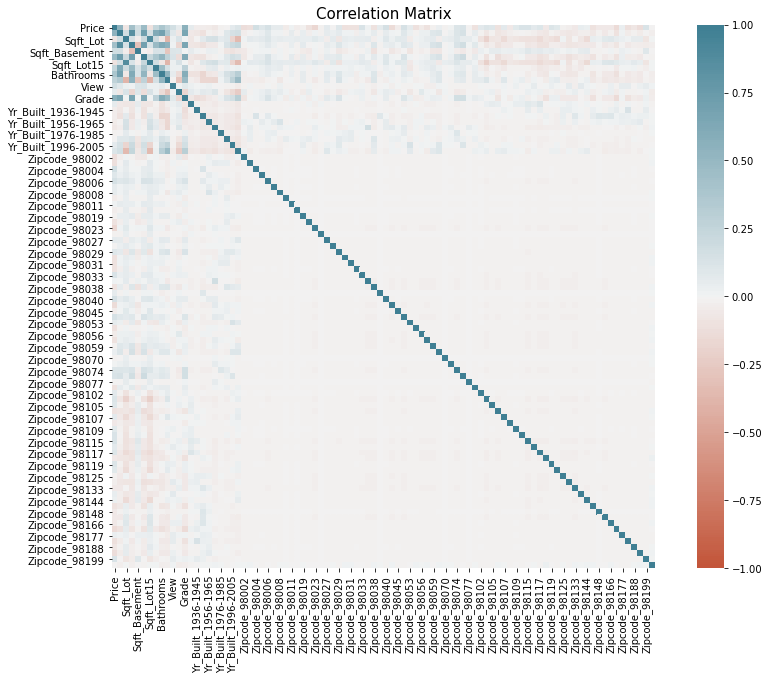

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.heatmap(preprocessed.corr(), 
            vmin=-1, vmax=1, center=0, 
            cmap=sns.diverging_palette(20, 220, n=200), 
            square=True)
plt.title('Correlation Matrix', fontsize=15);

plt.savefig(r'D:\Data Science\Module_2_Final_Project\Graphs\Correlation_Matrix.png', bbox_inches='tight');

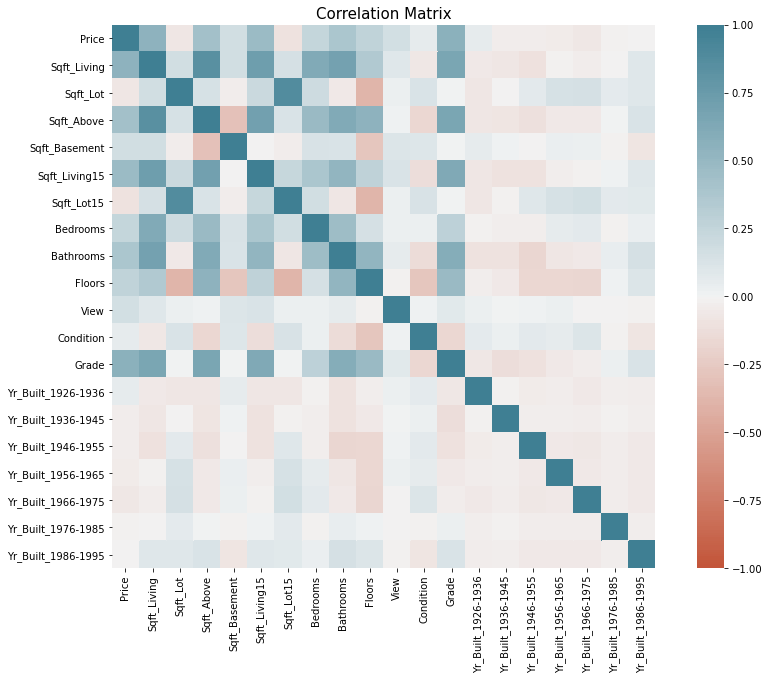

In [95]:
plt.figure(figsize=(15, 10))
sns.heatmap(preprocessed.iloc[:,:20].corr(), 
            vmin=-1, vmax=1, center=0, 
            cmap=sns.diverging_palette(20, 220, n=200), 
            square=True)
plt.title('Correlation Matrix', fontsize=15);
plt.savefig(r'D:\Data Science\Module_2_Final_Project\Graphs\Correlation_Matrix_2.png', bbox_inches='tight');

With some code, you can separate the highly correlated pairs. We are using 70% threshold for this model.

### Separating high correlated pairs

In [96]:
df2 = preprocessed.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df2['pairs'] = list(zip(df2.level_0, df2.level_1))

# set index to pairs
df2.set_index(['pairs'], inplace = True)

#d rop level columns
df2.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df2.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df2.drop_duplicates(inplace=True)

In [97]:
df2[(df2.cc>.7) & (df2.cc <1)]

,cc
pairs,
"(Sqft_Lot15, Sqft_Lot)",0.878122
"(Sqft_Above, Sqft_Living)",0.839986
"(Sqft_Living, Sqft_Living15)",0.719632
"(Sqft_Above, Sqft_Living15)",0.700075


* From the above table, we can see that **Sqft_Lot, Sqft_Lot15, Sqft_Living, Sqft_Living15** and **Sqft_Above** are all highly correlated. 
* Removing **Sqft_Lot15** and **Sqft_Living15** makes sense as houses in the same area with the same square footage will have similar average prices. We are also interested in the price of the actual house more than that of the neighbours so will remove these. 
* **Sqft_Above** and **Sqft_Living**, are one in the same so being highly correlated makes sense. Houses with larger living area will have larger total area. We will keep **Sqft_Living** as it depicts the total square footage of the house itself.

We will go ahead and remove these variables before moving on to the regression.

In [98]:
prep = preprocessed.drop(labels=['Sqft_Lot15', 'Sqft_Living15', 'Sqft_Above'], axis=1).copy()

In [99]:
prep.iloc[:,:20].corr()

,Price,Sqft_Living,Sqft_Lot,Sqft_Basement,Bedrooms,Bathrooms,Floors,View,Condition,Grade,Yr_Built_1926-1936,Yr_Built_1936-1945,Yr_Built_1946-1955,Yr_Built_1956-1965,Yr_Built_1966-1975,Yr_Built_1976-1985,Yr_Built_1986-1995,Yr_Built_1996-2005,Yr_Built_2006-2015,Zipcode_98002
Price,1.000000,0.539616,-0.077862,0.173220,0.245143,0.383103,0.258159,0.160858,0.055271,0.565554,0.056685,-0.036129,-0.038689,-0.043832,-0.068298,-0.008878,-0.005796,0.065414,0.110901,-0.122485
Sqft_Living,0.539616,1.000000,0.175407,0.174560,0.611237,0.695037,0.355238,0.096722,-0.065834,0.650886,-0.050830,-0.076662,-0.104199,-0.018999,-0.032206,-0.001181,0.085984,0.144724,0.168309,-0.035359
Sqft_Lot,-0.077862,0.175407,1.000000,-0.036136,0.193978,-0.059899,-0.376308,0.023476,0.128059,0.006227,-0.077913,-0.004949,0.075383,0.141142,0.152765,0.063470,0.088999,-0.182834,-0.353149,0.010336
Sqft_Basement,0.173220,0.174560,-0.036136,1.000000,0.133194,0.126272,-0.269522,0.114647,0.107928,0.007614,0.060110,0.009227,-0.005541,0.038578,0.026398,-0.008076,-0.083898,-0.091289,-0.062704,-0.049585
Bedrooms,0.245143,0.611237,0.193978,0.133194,1.000000,0.461561,0.148988,0.024468,0.023516,0.288598,-0.021140,-0.031182,-0.030435,0.055395,0.071817,-0.020242,0.036647,0.022208,0.024804,0.012781
Bathrooms,0.383103,0.695037,-0.059899,0.126272,0.461561,1.000000,0.528269,0.048222,-0.133174,0.592575,-0.087401,-0.101508,-0.174345,-0.071777,-0.054592,0.046290,0.148909,0.210333,0.320309,-0.026555
Floors,0.258159,0.355238,-0.376308,-0.269522,0.148988,0.528269,1.000000,-0.021147,-0.269819,0.478170,-0.027803,-0.053823,-0.171825,-0.158460,-0.175891,0.008752,0.114723,0.274774,0.472738,-0.023629
View,0.160858,0.096722,0.023476,0.114647,0.024468,0.048222,-0.021147,1.000000,0.020596,0.083435,0.026372,0.005450,0.013294,0.030878,-0.005233,-0.004856,-0.015474,-0.019894,-0.040013,-0.022349
Condition,0.055271,-0.065834,0.128059,0.107928,0.023516,-0.133174,-0.269819,0.020596,1.000000,-0.167157,0.067481,0.026388,0.077214,0.052959,0.111763,-0.011746,-0.083690,-0.154849,-0.234840,0.052940
Grade,0.565554,0.650886,0.006227,0.007614,0.288598,0.592575,0.478170,0.083435,-0.167157,1.000000,-0.064582,-0.119774,-0.105612,-0.049726,-0.031898,0.026762,0.122347,0.164858,0.304336,-0.081797


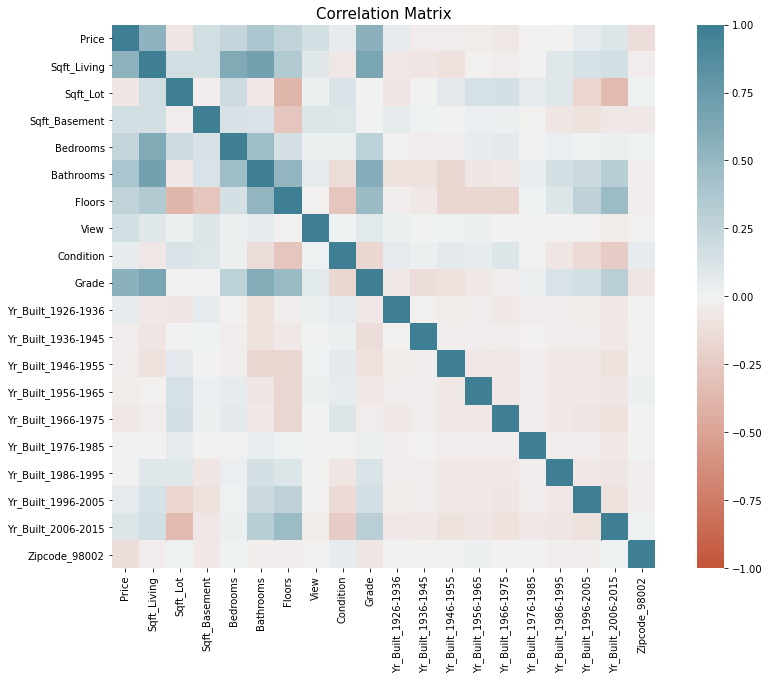

In [100]:
plt.figure(figsize=(15, 10))
sns.heatmap(prep.iloc[:,:20].corr(), 
            vmin=-1, vmax=1, center=0, 
            cmap=sns.diverging_palette(20, 220, n=200), 
            square=True)
plt.title('Correlation Matrix', fontsize=15);
plt.savefig(r'D:\Data Science\Module_2_Final_Project\Graphs\Correlation_Matrix_3.png', bbox_inches='tight');

### Running the correlation matrix again

In [101]:
df3 = prep.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df3['pairs'] = list(zip(df3.level_0, df3.level_1))

# set index to pairs
df3.set_index(['pairs'], inplace = True)

#d rop level columns
df3.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df3.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df3.drop_duplicates(inplace=True)

In [102]:
df3[(df3.cc>.7) & (df3.cc <1)]

,cc
pairs,


Our data seems to be good for multicollinearity of less than .7

In [103]:
prep.head()

,Price,Sqft_Living,Sqft_Lot,Sqft_Basement,Bedrooms,Bathrooms,Floors,View,Condition,Grade,...,Zipcode_98148,Zipcode_98155,Zipcode_98166,Zipcode_98168,Zipcode_98177,Zipcode_98178,Zipcode_98188,Zipcode_98198,Zipcode_98199,Year_Sold_2015
Id,,,,,,,,,,,,,,,,,,,,,
7129300520,221900.0,1180,5650,0.0,3,1.00,1.0,0.0,3,7,...,0,0,0,0,0,1,0,0,0,0
6414100192,538000.0,2570,7242,1.0,3,2.25,2.0,0.0,3,7,...,0,0,0,0,0,0,0,0,0,0
5631500400,180000.0,770,10000,0.0,2,1.00,1.0,0.0,3,6,...,0,0,0,0,0,0,0,0,0,1
2487200875,604000.0,1960,5000,1.0,4,3.00,1.0,0.0,5,7,...,0,0,0,0,0,0,0,0,0,0
1954400510,510000.0,1680,8080,0.0,3,2.00,1.0,0.0,3,8,...,0,0,0,0,0,0,0,0,0,1


Let's check the distribution of our final dataframe. 

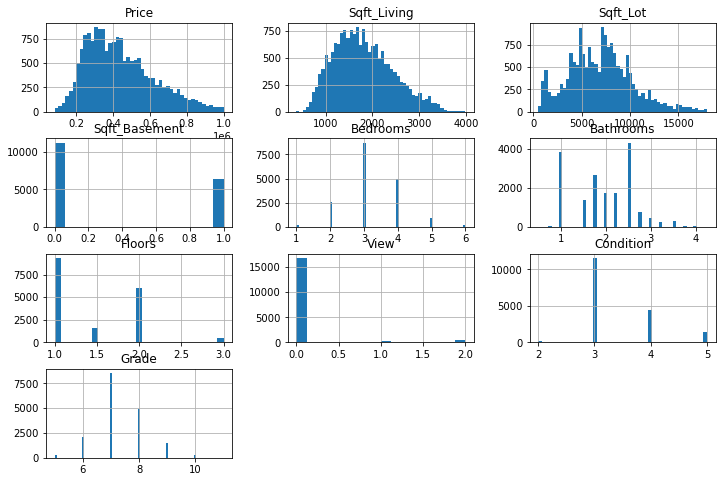

In [104]:
prep.iloc[:,:10].hist(figsize=(12,8), bins='auto');

Although clean, almost all of these plots need to be log transformed to make the distribution more normal.

### Log Transformation

In [105]:
log_column = ['Sqft_Living', 'Sqft_Lot', 'Bedrooms', 'Bathrooms', 'Floors', 'Condition', 'Grade']
log_df = prep.copy()

In [106]:
for i in log_column:
    log_df[i] = log_df[i].map(lambda x: np.log(x))

In [107]:
log_df.head()

,Price,Sqft_Living,Sqft_Lot,Sqft_Basement,Bedrooms,Bathrooms,Floors,View,Condition,Grade,...,Zipcode_98148,Zipcode_98155,Zipcode_98166,Zipcode_98168,Zipcode_98177,Zipcode_98178,Zipcode_98188,Zipcode_98198,Zipcode_98199,Year_Sold_2015
Id,,,,,,,,,,,,,,,,,,,,,
7129300520,221900.0,7.073270,8.639411,0.0,1.098612,0.000000,0.000000,0.0,1.098612,1.945910,...,0,0,0,0,0,1,0,0,0,0
6414100192,538000.0,7.851661,8.887653,1.0,1.098612,0.810930,0.693147,0.0,1.098612,1.945910,...,0,0,0,0,0,0,0,0,0,0
5631500400,180000.0,6.646391,9.210340,0.0,0.693147,0.000000,0.000000,0.0,1.098612,1.791759,...,0,0,0,0,0,0,0,0,0,1
2487200875,604000.0,7.580700,8.517193,1.0,1.386294,1.098612,0.000000,0.0,1.609438,1.945910,...,0,0,0,0,0,0,0,0,0,0
1954400510,510000.0,7.426549,8.997147,0.0,1.098612,0.693147,0.000000,0.0,1.098612,2.079442,...,0,0,0,0,0,0,0,0,0,1


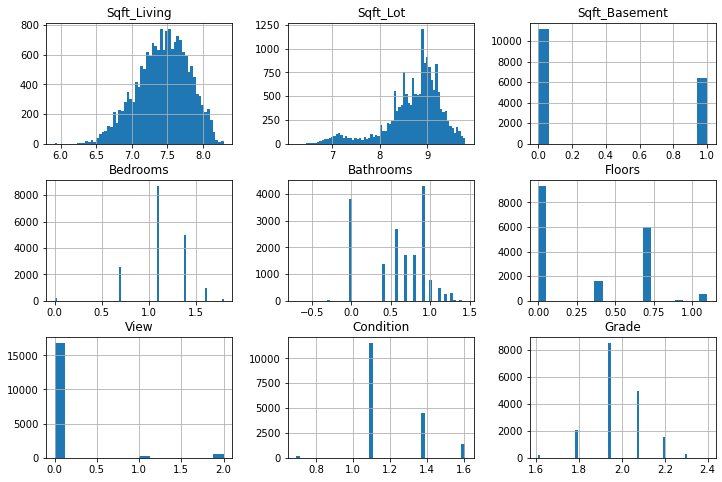

In [108]:
log_df.iloc[:,1:10].hist(figsize=(12,8), bins='auto');

Let's use Stepwise selection to decide what to include and what not to include in our model.

### Stepwise Selection

In [109]:
import statsmodels.api as sm

In [110]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [111]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [112]:
X = log_df.drop('Price', axis=1)
y = log_df['Price']

result = stepwise_selection(X, y, verbose = True)
print('resulting features:')
print(result)

Add  Grade                          with p-value 0.0
Add  Sqft_Living                    with p-value 1.14475e-256
Add  Zipcode_98023                  with p-value 1.23171e-176
Add  Zipcode_98004                  with p-value 7.28817e-138
Add  Zipcode_98115                  with p-value 3.61984e-137
Add  Zipcode_98117                  with p-value 5.01014e-132
Add  Zipcode_98103                  with p-value 6.78249e-138
Add  Zipcode_98040                  with p-value 1.59734e-115
Add  Zipcode_98042                  with p-value 7.79274e-115
Add  Zipcode_98092                  with p-value 1.67357e-119
Add  Zipcode_98038                  with p-value 2.13411e-121
Add  Zipcode_98003                  with p-value 6.92566e-118
Add  Zipcode_98112                  with p-value 7.4287e-108
Add  Zipcode_98199                  with p-value 2.21147e-111
Add  Zipcode_98030                  with p-value 8.41503e-107
Add  Zipcode_98058                  with p-value 1.0529e-109
Add  Zipcode_98031 

In [113]:
result.sort()

### Base model

In [114]:
X_fin = X[result]
X_int = sm.add_constant(X_fin)
model = sm.OLS(y,X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     993.9
Date:                Tue, 11 May 2021   Prob (F-statistic):               0.00
Time:                        17:14:58   Log-Likelihood:            -2.2357e+05
No. Observations:               17593   AIC:                         4.473e+05
Df Residuals:                   17516   BIC:                         4.479e+05
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -2.283e+06   2.09e+04   -109.322      0.000   -2.32e+06   -2.24e+06
Bedrooms           -1.603e+04   2996.073     -5.352      0.000   -2.19e+04   -1.02e+04
Condition           7.007e+04   3743.020     18.720      0.000    6.27e+04    7.74e+04
Grade               2.912e+05   7519.772     38.725      0.000    2.76e+05    3.06e+05
Sqft_Basement      -2.184e+04   1449.816    -15.065      0.000   -2.47e+04    -1.9e+04
Sqft_Living         1.992e+05   3089.056     64.495      0.000    1.93e+05    2.05e+05
Sqft_Lot            4.722e+04   1677.778     28.147      0.000    4.39e+04    5.05e+04
View                3.591e+04   1711.156     20.987      0.000    3.26e+04    3.93e+04
Year_Sold_2015      1.973e+04   1289.645     15.302      0.000    1.72e+04    2.23e+04
Yr_Built_1926-1936  2.457e+04   3746.177      6.559      0.000    1.72e+04    3.19e+04
Yr_Built_1946-1955  -2.01e+04   2919.951     -6.882      0.000   -2.58e+04   -1.44e+04
Yr_Built_1956-1965 -2.008e+04   2959.768     -6.785      0.000   -2.59e+04   -1.43e+04
Yr_Built_1966-1975 -9338.7260   2514.693     -3.714      0.000   -1.43e+04   -4409.677
Yr_Built_1996-2005  8859.0123   2945.550      3.008      0.003    3085.441    1.46e+04
Yr_Built_2006-2015  2.765e+04   2474.054     11.175      0.000    2.28e+04    3.25e+04
Zipcode_98004       5.165e+05   7780.025     66.392      0.000    5.01e+05    5.32e+05
Zipcode_98005       3.397e+05   8547.606     39.741      0.000    3.23e+05    3.56e+05
Zipcode_98006       2.845e+05   4956.920     57.398      0.000    2.75e+05    2.94e+05
Zipcode_98007       2.583e+05   7222.712     35.757      0.000    2.44e+05    2.72e+05
Zipcode_98008       2.457e+05   5573.813     44.078      0.000    2.35e+05    2.57e+05
Zipcode_98010       6.045e+04   1.27e+04      4.776      0.000    3.56e+04    8.53e+04
Zipcode_98011       1.572e+05   6371.435     24.675      0.000    1.45e+05     1.7e+05
Zipcode_98014        7.98e+04   1.33e+04      5.994      0.000    5.37e+04    1.06e+05
Zipcode_98019        9.22e+04   7136.879     12.919      0.000    7.82e+04    1.06e+05
Zipcode_98023      -1.296e+04   4083.517     -3.173      0.002    -2.1e+04   -4951.354
Zipcode_98024       1.256e+05   1.72e+04      7.308      0.000    9.19e+04    1.59e+05
Zipcode_98027       2.559e+05   5671.804     45.114      0.000    2.45e+05    2.67e+05
Zipcode_98028       1.347e+05   5595.127     24.069      0.000    1.24e+05    1.46e+05
Zipcode_98029       2.496e+05   5165.489     48.324      0.000    2.39e+05     2.6e+05
Zipcode_98033       3.138e+05   4938.173     63.554      0.000    3.04e+05    3.24e+05
Zipcode_98034        1.86e+05   4102.690     45.340      0.000    1.78e+05    1.94e+05
Zipcode_98038       3.473e+04   4091.746      8.487      0.000    2.67e+04    4.27e+04
Zipcode_98039       6.887e+05   2.44e+

The model summary shows a R-square of 0.831 which is very good. This means that our base model is able to explain or account for 83.1% of variability present in our target variable. High variability or R-square could also be an indication of overfitting. We can check that through Cross-Validation as shown below. 

We can now go and cross-validate the model to check for underfitting or overfitting.

### Cross-Validation

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(y_train, y_hat_train)
mse_test = mean_squared_error(y_test, y_hat_test)

print(mse_train)
print(mse_test)

6322559412.242661
6632492942.207829


In [116]:
def kfolds(data, k):
    
    data = pd.DataFrame(data)
    num_observations = len(data)
    fold_size = num_observations//k
    leftovers = num_observations%k
    folds = []
    start_obs = 0
    for fold_n in range(1,k+1):
        if fold_n <= leftovers:
            #Fold Size will be 1 larger to account for leftovers
            fold =  data.iloc[start_obs : start_obs+fold_size+1] 
            folds.append(fold)
            start_obs +=  fold_size + 1
        else:
            fold =  data.iloc[start_obs : start_obs+fold_size] 
            folds.append(fold)
            start_obs +=  fold_size
            
    return folds 

In [117]:
data = pd.concat([X, y], axis=1)
folds = kfolds(data, 5)

In [118]:
test_errs = []
train_errs = []
k=5

for n in range(k):
    # Split in train and test for the fold
    train = pd.concat([fold for i, fold in enumerate(folds) if i!=n])
    test = folds[n]
    # Fit a linear regression model
    linreg.fit(X_train, y_train)
    #Evaluate Train and Test Errors
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_residuals = y_hat_train - y_train
    test_residuals = y_hat_test - y_test
    train_errs.append(np.mean(train_residuals.astype(float)**2))
    test_errs.append(np.mean(test_residuals.astype(float)**2))
print(train_errs)
print(test_errs)

[6322559412.242608, 6322559412.242608, 6322559412.242608, 6322559412.242608, 6322559412.242608]
[6632492942.207819, 6632492942.207819, 6632492942.207819, 6632492942.207819, 6632492942.207819]


In [119]:
print('Train MSE:')
print(train_errs)
print('Train RMSE:')
print(np.sqrt(train_errs), '\n')
print('Test MSE:')
print(test_errs)
print('Test RMSE:')
print(np.sqrt(test_errs))

Train MSE:
[6322559412.242608, 6322559412.242608, 6322559412.242608, 6322559412.242608, 6322559412.242608]
Train RMSE:
[79514.52327872 79514.52327872 79514.52327872 79514.52327872
 79514.52327872] 

Test MSE:
[6632492942.207819, 6632492942.207819, 6632492942.207819, 6632492942.207819, 6632492942.207819]
Test RMSE:
[81440.11875119 81440.11875119 81440.11875119 81440.11875119
 81440.11875119]


The test error is slightly higher than our train error. This confirms that the model is a good fit. We can use this as our final model.

### Final Model

In [120]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     993.9
Date:                Tue, 11 May 2021   Prob (F-statistic):               0.00
Time:                        17:14:59   Log-Likelihood:            -2.2357e+05
No. Observations:               17593   AIC:                         4.473e+05
Df Residuals:                   17516   BIC:                         4.479e+05
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -2.283e+06   2.09e+04   -109.322      0.000   -2.32e+06   -2.24e+06
Bedrooms           -1.603e+04   2996.073     -5.352      0.000   -2.19e+04   -1.02e+04
Condition           7.007e+04   3743.020     18.720      0.000    6.27e+04    7.74e+04
Grade               2.912e+05   7519.772     38.725      0.000    2.76e+05    3.06e+05
Sqft_Basement      -2.184e+04   1449.816    -15.065      0.000   -2.47e+04    -1.9e+04
Sqft_Living         1.992e+05   3089.056     64.495      0.000    1.93e+05    2.05e+05
Sqft_Lot            4.722e+04   1677.778     28.147      0.000    4.39e+04    5.05e+04
View                3.591e+04   1711.156     20.987      0.000    3.26e+04    3.93e+04
Year_Sold_2015      1.973e+04   1289.645     15.302      0.000    1.72e+04    2.23e+04
Yr_Built_1926-1936  2.457e+04   3746.177      6.559      0.000    1.72e+04    3.19e+04
Yr_Built_1946-1955  -2.01e+04   2919.951     -6.882      0.000   -2.58e+04   -1.44e+04
Yr_Built_1956-1965 -2.008e+04   2959.768     -6.785      0.000   -2.59e+04   -1.43e+04
Yr_Built_1966-1975 -9338.7260   2514.693     -3.714      0.000   -1.43e+04   -4409.677
Yr_Built_1996-2005  8859.0123   2945.550      3.008      0.003    3085.441    1.46e+04
Yr_Built_2006-2015  2.765e+04   2474.054     11.175      0.000    2.28e+04    3.25e+04
Zipcode_98004       5.165e+05   7780.025     66.392      0.000    5.01e+05    5.32e+05
Zipcode_98005       3.397e+05   8547.606     39.741      0.000    3.23e+05    3.56e+05
Zipcode_98006       2.845e+05   4956.920     57.398      0.000    2.75e+05    2.94e+05
Zipcode_98007       2.583e+05   7222.712     35.757      0.000    2.44e+05    2.72e+05
Zipcode_98008       2.457e+05   5573.813     44.078      0.000    2.35e+05    2.57e+05
Zipcode_98010       6.045e+04   1.27e+04      4.776      0.000    3.56e+04    8.53e+04
Zipcode_98011       1.572e+05   6371.435     24.675      0.000    1.45e+05     1.7e+05
Zipcode_98014        7.98e+04   1.33e+04      5.994      0.000    5.37e+04    1.06e+05
Zipcode_98019        9.22e+04   7136.879     12.919      0.000    7.82e+04    1.06e+05
Zipcode_98023      -1.296e+04   4083.517     -3.173      0.002    -2.1e+04   -4951.354
Zipcode_98024       1.256e+05   1.72e+04      7.308      0.000    9.19e+04    1.59e+05
Zipcode_98027       2.559e+05   5671.804     45.114      0.000    2.45e+05    2.67e+05
Zipcode_98028       1.347e+05   5595.127     24.069      0.000    1.24e+05    1.46e+05
Zipcode_98029       2.496e+05   5165.489     48.324      0.000    2.39e+05     2.6e+05
Zipcode_98033       3.138e+05   4938.173     63.554      0.000    3.04e+05    3.24e+05
Zipcode_98034        1.86e+05   4102.690     45.340      0.000    1.78e+05    1.94e+05
Zipcode_98038       3.473e+04   4091.746      8.487      0.000    2.67e+04    4.27e+04
Zipcode_98039       6.887e+05   2.44e+

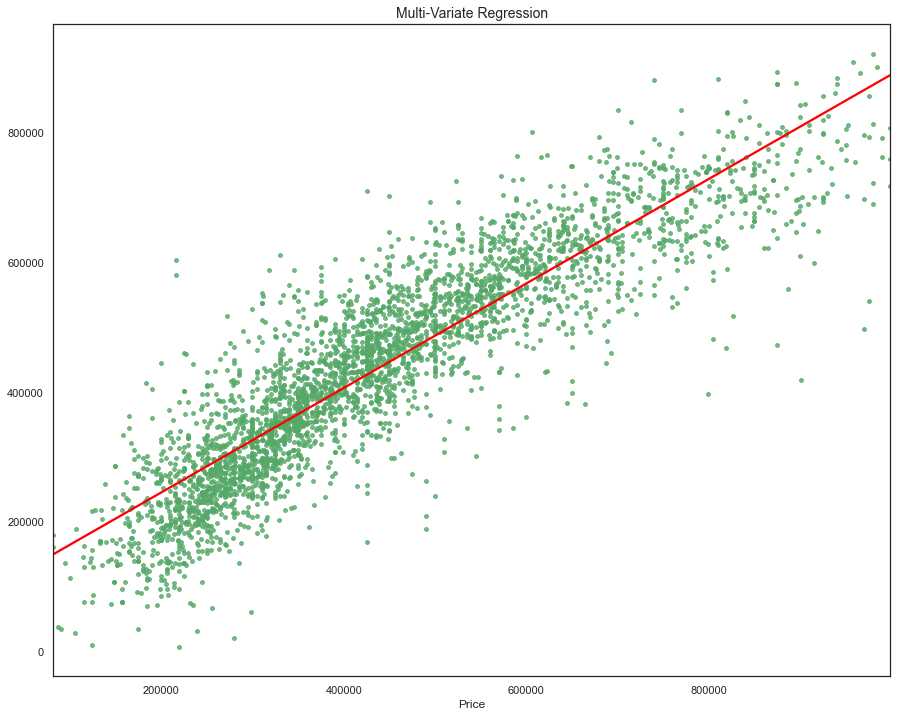

In [121]:
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

plt.figure(figsize=(15,12))
sns.set(style='white', color_codes=True)
sns.regplot(y_test, y=y_hat_test, ci=None,  scatter_kws={'s': 15, 'color':'g'}, line_kws={'color': 'red'})

plt.title('Multi-Variate Regression', fontsize=14);

The line of best fit is plotted pretty well in our data. This confirms that our model has worked and will predict prices of the houses accurately.

Let's check the coefficients of each predictor that adds or subtracts value from a house.

In [122]:
coefficients = pd.DataFrame(model.params)

In [123]:
coefficients

,0
const,-2.282660e+06
Bedrooms,-1.603361e+04
Condition,7.006841e+04
Grade,2.912007e+05
Sqft_Basement,-2.184095e+04
...,...
Zipcode_98177,2.180078e+05
Zipcode_98178,6.504919e+04
Zipcode_98188,3.448682e+04
Zipcode_98198,2.618073e+04


In [124]:
coefficients.iloc[:20]

,0
const,-2.282660e+06
Bedrooms,-1.603361e+04
Condition,7.006841e+04
Grade,2.912007e+05
Sqft_Basement,-2.184095e+04
Sqft_Living,1.992273e+05
Sqft_Lot,4.722496e+04
View,3.591177e+04
Year_Sold_2015,1.973478e+04
Yr_Built_1926-1936,2.457081e+04


We can perform reverse log to calculate dollar impact for each predictor.

### Reverse Log

In [125]:
coef = coefficients.transpose()

In [126]:
coef

,const,Bedrooms,Condition,Grade,Sqft_Basement,Sqft_Living,Sqft_Lot,View,Year_Sold_2015,Yr_Built_1926-1936,...,Zipcode_98146,Zipcode_98148,Zipcode_98155,Zipcode_98166,Zipcode_98168,Zipcode_98177,Zipcode_98178,Zipcode_98188,Zipcode_98198,Zipcode_98199
0,-2.282660e+06,-16033.608268,70068.413902,291200.698726,-21840.945064,199227.336025,47224.958015,35911.77214,19734.779435,24570.805518,...,99759.593267,58375.918664,144416.810483,100300.467512,56117.348697,218007.799524,65049.194785,34486.816276,26180.73046,378382.347061


In [127]:
round(coef.const,2)

0   -2282659.55
Name: const, dtype: float64

In [128]:
coef.columns[1:10]

Index(['Bedrooms', 'Condition', 'Grade', 'Sqft_Basement', 'Sqft_Living',
       'Sqft_Lot', 'View', 'Year_Sold_2015', 'Yr_Built_1926-1936'],
      dtype='object')

#### Bedrooms

In [129]:
Bedrooms = [1,2,3,4,5,6]

for i in Bedrooms:
    coeff = coef.Bedrooms * np.log(i)
    print(i, 'Bedrooms: ', '$', round(coeff[0],2))

1 Bedrooms:  $ -0.0
2 Bedrooms:  $ -11113.65
3 Bedrooms:  $ -17614.72
4 Bedrooms:  $ -22227.3
5 Bedrooms:  $ -25805.1
6 Bedrooms:  $ -28728.37


#### Condition

In [130]:
Condition = [2,3,4,5]

for i in Condition:
    coeff = coef.Condition * np.log(i)
    print(i, ': ', '$', round(coeff[0],2))

2 :  $ 48567.72
3 :  $ 76978.02
4 :  $ 97135.45
5 :  $ 112770.76


#### Grade

In [131]:
Grade = [5,6,7,8,9,10,11]

for i in Grade:
    coeff = coef.Grade * np.log(i)
    print(i,': ', '$', round(coeff[0],2))

5 :  $ 468669.44
6 :  $ 521761.61
7 :  $ 566650.4
8 :  $ 605534.83
9 :  $ 639833.33
10 :  $ 670514.39
11 :  $ 698268.78


#### Sqft_Living

In [132]:
living = [1, 2, 3, 4, 5]

for i in living:
    coeff = coef.Sqft_Living * np.log(i)
    print(i*1000, 'sqft: ', '$', round(coeff[0],2))

1000 sqft:  $ 0.0
2000 sqft:  $ 138093.87
3000 sqft:  $ 218873.6
4000 sqft:  $ 276187.73
5000 sqft:  $ 320644.03


#### Sqft_Lot

In [133]:
lot = [10, 15, 20, 25, 30]

for i in lot:
    coeff = coef.Sqft_Lot * np.log(i)
    print(i*1000, 'sqft: ', '$', round(coeff[0],2))

10000 sqft:  $ 108739.48
15000 sqft:  $ 127887.56
20000 sqft:  $ 141473.33
25000 sqft:  $ 152011.28
30000 sqft:  $ 160621.4


We can sort the zipcode coefficients to find location based values in King County.

### Location based value

In [134]:
zipcodes = coefficients.loc['Zipcode_98004':'Zipcode_98199']

In [135]:
zipcodes

,0
Zipcode_98004,516534.249900
Zipcode_98005,339688.293205
Zipcode_98006,284518.973640
Zipcode_98007,258263.306174
Zipcode_98008,245681.024249
...,...
Zipcode_98177,218007.799524
Zipcode_98178,65049.194785
Zipcode_98188,34486.816276
Zipcode_98198,26180.730460


In [136]:
top_5_zipcodes = zipcodes.sort_values(by=0, ascending=False)[:5]
top_5_zipcodes

,0
Zipcode_98039,688732.484156
Zipcode_98004,516534.249900
Zipcode_98112,449852.151620
Zipcode_98102,447388.757401
Zipcode_98109,443946.307920


In [137]:
least_5_zipcodes = zipcodes.sort_values(by=0, ascending=True)[:5]
least_5_zipcodes

,0
Zipcode_98092,-20279.890300
Zipcode_98023,-12955.454147
Zipcode_98198,26180.730460
Zipcode_98188,34486.816276
Zipcode_98038,34726.239765


### Conclusion

Based on the regression, our final model shows some meaningful relationships on how different variables affect the overall **Price** of a house. With an overall coefficient of **- $228k** each of the characterstic's coefficients are added in multiples of their respective quantity, in order to give the final price of a house.

The following characterstics have a positive relationship with Price and helps increase the value of a home.
* Sqft Living 
* Sqft Lot 
* Condition of the house 
* Grade of the house 
* Year Built before 1935
* Premium locations (Zipcode)

**Number of Bedrooms** show a negative coefficient in the model. This could be becuase the model calculates the coefficients considering all factors that lead to a final price of a house. It seems that our model is weighted more on the total area, condition, grade, zipcode, etc, which when factoring for Bedroooms is showing a negative relationship to the final price. This could also mean that higher number of Bedrooms per Sqft Living or Sqft Lot, is considered to decrease the value of a home.

**Houses built before the year of 1935** seem to have a positive relationship with Price. It can be explained that these houses might have been preserving their value since they are over 50 years of age and are considered as historic. The **houses after 1945** have a decreasing negative relationship with Price, which confirms the market notion that old houses have lesser value than the new ones.

The relationship between different **Zipcodes** and Price shows the overall distribution of expensive houses to cheaper ones in King County. The top 5 zipcodes with the highest home values are as follows:
* Zipcode_98039	
* Zipcode_98004
* Zipcode_98112	
* Zipcode_98102	
* Zipcode_98109

While the least desirable zipcodes are as follows:
* Zipcode_98092	
* Zipcode_98023	
* Zipcode_98198	
* Zipcode_98188	
* Zipcode_98038

### Predict House Price

In [138]:
params = coefficients.transpose()
params

,const,Bedrooms,Condition,Grade,Sqft_Basement,Sqft_Living,Sqft_Lot,View,Year_Sold_2015,Yr_Built_1926-1936,...,Zipcode_98146,Zipcode_98148,Zipcode_98155,Zipcode_98166,Zipcode_98168,Zipcode_98177,Zipcode_98178,Zipcode_98188,Zipcode_98198,Zipcode_98199
0,-2.282660e+06,-16033.608268,70068.413902,291200.698726,-21840.945064,199227.336025,47224.958015,35911.77214,19734.779435,24570.805518,...,99759.593267,58375.918664,144416.810483,100300.467512,56117.348697,218007.799524,65049.194785,34486.816276,26180.73046,378382.347061


In [139]:
random_house = prep.sample()
Id = random_house.index[0]
random_house.transpose().sort_values(by=Id, ascending=False)[:11]

Id,3797700030
Price,262500.00
Sqft_Lot,10390.00
Sqft_Living,1470.00
Grade,7.00
Condition,3.00
Bedrooms,3.00
Bathrooms,1.75
Floors,1.00
Zipcode_98031,1.00
Zipcode_98109,0.00


In [144]:
predicted_house = params.const + \
    (params.Sqft_Lot * np.log(random_house.Sqft_Lot.values[0])) + \
    (params.Sqft_Living * np.log(random_house.Sqft_Living.values[0])) + \
    (params.Grade * np.log(random_house.Grade.values[0])) + \
    (params.Bedrooms * np.log(random_house.Bedrooms.values[0])) + \
    (params.Condition * np.log(random_house.Condition.values[0])) + \
    (params.Zipcode_98112 * 0) + \
    (params['Yr_Built_1926-1936'] * 0) + \
    (params.Year_Sold_2015 * 0)

print('Actual Price: ', round(random_house.Price.values[0]))
print('Predicted Price: ', round(predicted_house[0]))

Actual Price:  262500
Predicted Price:  233087
